# Approche classique: embeddings de mots

In [49]:
import pandas as pd

In [86]:
train_df = pd.read_csv("./data/train_df.csv", index_col=0)
test_df = pd.read_csv("./data/test_df.csv", index_col=0)

In [88]:
y_train = train_df["target"]
y_test = test_df["target"]

In [89]:
valeurs_manquantes = y_train.isnull().sum()
print(f"Nombre de valeurs manquantes dans y_train : {valeurs_manquantes}")

Nombre de valeurs manquantes dans y_train : 0


In [92]:
# # Vérification de
# import pandas as pd

# # Supposons que train_df soit votre DataFrame
# # train_df = pd.read_csv('votre_fichier.csv')

# # Filtrer les lignes où preprocessed_text est NA
# na_rows = train_df[train_df['cleaned_text'].isna()]

# # Afficher les lignes filtrées
# display(na_rows)


### Embeddings de comptage des mots

En réalisant les embeddings de façon indépendante sur le jeu de train et de test on s'assure qu'il n'y a pas de fuite de données et que l'appréciation de performance du modèle ne sera pas biaisée. Cependant il y a un fort risque d'avoir des OOV lors du test.

#### CountVectorizer

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
train_count_sparse = count_vectorizer.fit_transform(train_df['cleaned_text'])

test_count_sparse = count_vectorizer.transform(test_df['cleaned_text'])


In [98]:
import scipy.sparse

train_count = pd.DataFrame.sparse.from_spmatrix(train_count_sparse, columns=count_vectorizer.get_feature_names_out())

test_count = pd.DataFrame.sparse.from_spmatrix(test_count_sparse, columns=count_vectorizer.get_feature_names_out())



In [100]:
from scipy.sparse import csr_matrix, hstack
train_count["target"] = y_train.values
test_count["target"] = y_test.values

### Modélisation des embeddings : test rapides avec Pycaret

In [12]:
# pip install pycaret[full]

In [105]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data=train_count, target='target', test_data=test_count, session_id = 123, index=False)


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(147939, 48385)"
4,Transformed data shape,"(147939, 48385)"
5,Transformed train set shape,"(103557, 48385)"
6,Transformed test set shape,"(44382, 48385)"
7,Numeric features,48384
8,Preprocess,True
9,Imputation type,simple


In [107]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()


In [109]:
# check the type of exp A CHANGER POUR MLFLOW à ce moment là le setup se fait avec 
type(exp)
# exp.setup(data, target = 'Class variable', session_id = 123)

pycaret.classification.oop.ClassificationExperiment

In [111]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.7813,0.8536,0.7961,0.7721,0.7838,0.5627,0.5630,22.7290
et,Extra Trees Classifier,0.7807,0.8605,0.7455,0.8005,0.7720,0.5613,0.5626,172.5210
lr,Logistic Regression,0.7784,0.8510,0.7907,0.7704,0.7804,0.5569,0.5571,22.8050
catboost,CatBoost Classifier,0.7753,0.8522,0.8006,0.7607,0.7802,0.5507,0.5514,59.8610
rf,Random Forest Classifier,0.7718,0.8531,0.7414,0.7879,0.7639,0.5435,0.5445,117.7070
ridge,Ridge Classifier,0.7608,0.8268,0.7736,0.7530,0.7631,0.5217,0.5219,23.4780
gbc,Gradient Boosting Classifier,0.7014,0.7770,0.7761,0.6738,0.7213,0.4031,0.4078,104.4260
dt,Decision Tree Classifier,0.6994,0.6990,0.6935,0.7001,0.6968,0.3988,0.3988,30.8440
ada,Ada Boost Classifier,0.6910,0.7646,0.7807,0.6606,0.7156,0.3824,0.3888,63.1360
knn,K Neighbors Classifier,0.6602,0.7198,0.7503,0.6343,0.6874,0.3208,0.3263,107.3420


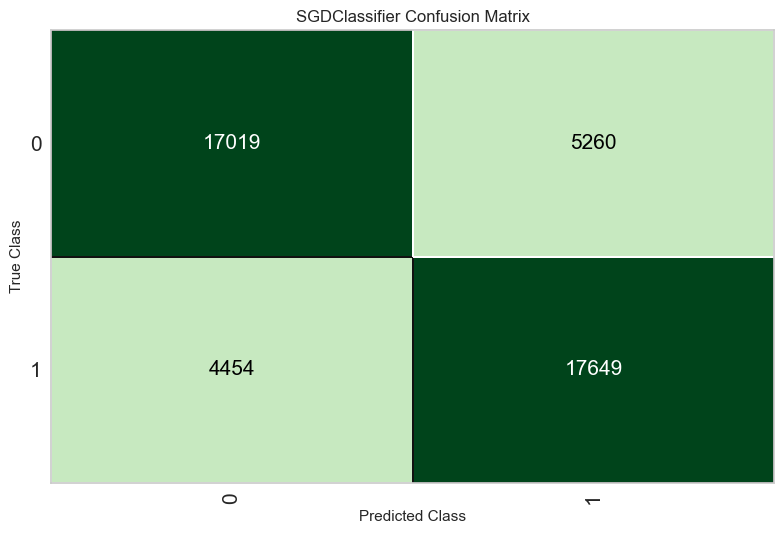

In [113]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [115]:
automl()

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### TFIdF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 2,max_df = 0.5,ngram_range = (1,2))
train_tfidf = tfidf.fit_transform(train_df['cleaned_text'])
test_tfidf = tfidf.transform(test_df['cleaned_text'])